In [2]:
import sys
import yaml
import torch
import logging
from pathlib import Path

# Add the path to the directory containing the omnicell package
# Assuming the omnicell package is in the parent directory of your notebook
sys.path.append('../../')  # Adjust this path as needed


import pandas as pd
import yaml
import torch
from omnicell.data.catalogue import Catalogue
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [3]:

dataset = 'repogle_k562_essential_raw'

dd = Catalogue.get_dataset_details(dataset)


folder_path = Path(dd.folder_path)


DEGs = json.load(open(folder_path / 'DEGs.json'))

In [4]:
data = DEGs

data.keys()

dict_keys(['k562'])

In [8]:
# 1. First, check your memory usage
import psutil
import os

def print_memory_usage():
    process = psutil.Process(os.getpid())
    print(f"Memory usage: {process.memory_info().rss / 1024 / 1024 / 1024:.2f} GB")

def check_swap_usage():
    swap = psutil.swap_memory()
    print(f"Swap used: {swap.used / 1024 / 1024 / 1024:.2f} GB")
    print(f"Swap total: {swap.total / 1024 / 1024 / 1024:.2f} GB")
    
def print_system_memory():
    vm = psutil.virtual_memory()
    print(f"Total RAM: {vm.total / 1024 / 1024 / 1024:.2f} GB")
    print(f"Available RAM: {vm.available / 1024 / 1024 / 1024:.2f} GB")
    print(f"Used RAM: {vm.used / 1024 / 1024 / 1024:.2f} GB")
    print(f"RAM Usage Percentage: {vm.percent}%")
    
print_system_memory()
check_swap_usage()

print_memory_usage()

Total RAM: 2014.89 GB
Available RAM: 1943.76 GB
Used RAM: 44.32 GB
RAM Usage Percentage: 3.5%
Swap used: 2.34 GB
Swap total: 4.00 GB
Memory usage: 6.66 GB


In [9]:

data['k562']['NAF1']

pd.DataFrame.from_dict(data['k562']['NAF1'], orient='index')

,scores,pvals_adj,lfc
NAF1,-6.132826,0.000007,-2.420829
RPL3,-5.004738,0.002395,-0.252607
MT-ND1,4.609026,0.011547,0.202007
RPL10A,-4.010252,0.129845,-0.196712
DEF6,3.804987,0.242867,1.069095
...,...,...,...
MRTFA,0.001098,0.999591,0.039393
ANKS3,0.000803,0.999710,0.016496
HDDC3,-0.000421,0.999800,-0.004610
CLN3,-0.000366,0.999800,-0.006871


In [10]:

data_significant_degs = {}
for cell_line, perts in data.items():

    number_DEGS = []
    print(cell_line)
    for pert, DEGs in perts.items():
        if DEGs is None:
            print(f"Cell line: {cell_line}, Pert: {pert} has no DEGs")
            number_DEGS.append(0)

        else:
            try:
                df = pd.DataFrame.from_dict(DEGs, orient='index')
            except:
                print(f"Cell line: {cell_line}, Pert: {pert} threw an error, DEGs: {DEGs}")
                raise ValueError('Error')
                

            df_significant = df[df['pvals_adj'] < 0.05]
            number_DEGS.append(len(df_significant))
    data_significant_degs[cell_line] = number_DEGS
            



k562


In [11]:
data_significant_degs

{'k562': [35,
  59,
  1262,
  591,
  5129,
  352,
  366,
  3095,
  114,
  117,
  34,
  15,
  197,
  6,
  1,
  1708,
  4053,
  1,
  540,
  42,
  607,
  1593,
  10,
  118,
  388,
  2321,
  0,
  4057,
  1745,
  1721,
  18,
  2378,
  101,
  1106,
  39,
  251,
  1374,
  309,
  375,
  67,
  254,
  141,
  3,
  1216,
  40,
  5,
  424,
  500,
  0,
  90,
  19,
  201,
  1,
  2,
  1,
  828,
  2795,
  0,
  617,
  0,
  25,
  5,
  487,
  2775,
  33,
  0,
  1,
  1,
  0,
  1,
  0,
  54,
  4,
  138,
  13,
  0,
  34,
  202,
  791,
  1704,
  25,
  363,
  439,
  1698,
  1,
  1,
  0,
  0,
  1252,
  2,
  2804,
  29,
  27,
  634,
  3,
  0,
  46,
  362,
  0,
  10,
  369,
  798,
  0,
  2145,
  699,
  261,
  5,
  22,
  495,
  4,
  193,
  5,
  5259,
  3974,
  20,
  12,
  33,
  11,
  75,
  2125,
  1,
  3641,
  2549,
  162,
  1126,
  48,
  164,
  422,
  599,
  2801,
  597,
  0,
  116,
  3796,
  3,
  178,
  75,
  94,
  324,
  0,
  183,
  138,
  96,
  3,
  29,
  39,
  17,
  1951,
  88,
  3,
  355,
  345,
  10,
  1,
 

In [12]:


test_data = {
    'K562\nGenomeWide': np.random.lognormal(2, 1, 1000),
    'K562\nEssential': np.random.lognormal(2, 0.5, 1000),
    'RPE1\nEssential': np.random.lognormal(2, 0.6, 1000),
    'Jurkat\nEssential': np.random.lognormal(2, 0.4, 1000),
    'HepG2\nEssential': np.random.lognormal(2, 0.7, 1000)
}


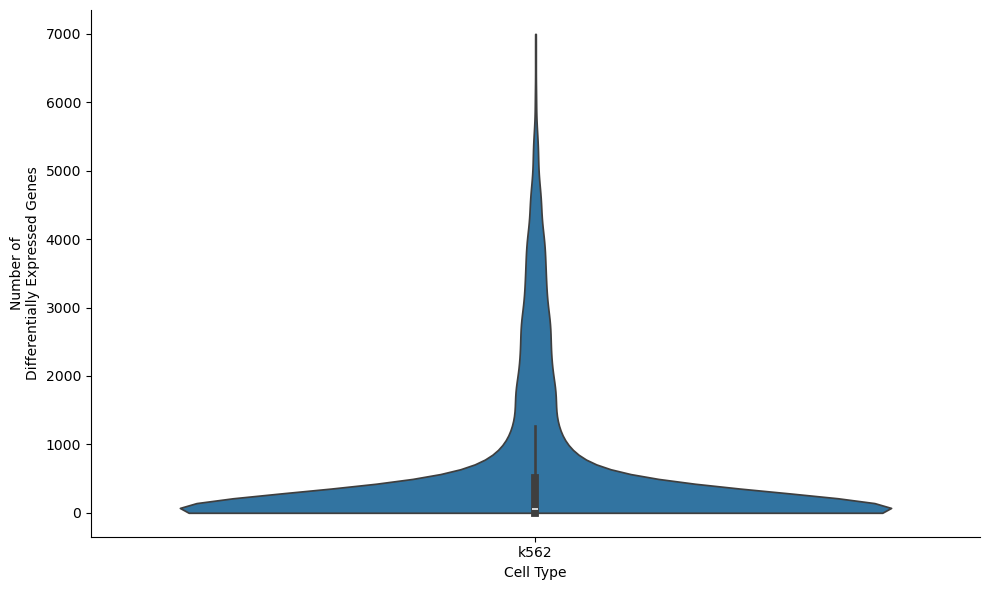

In [16]:


# Convert to long format DataFrame
df = pd.DataFrame({
    'Cell Type': np.repeat(list(data_significant_degs.keys()), [len(v) for v in data_significant_degs.values()]),
    'Expression': np.concatenate(list(data_significant_degs.values()))
})

# Create the plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Cell Type', y='Expression', cut=0)

# Set y-axis to log scale
plt.yscale('linear')
plt.ylabel('Number of\nDifferentially Expressed Genes')
plt.xticks(rotation=0)

# Remove top and right spines
sns.despine()

plt.tight_layout()
plt.show()

In [6]:
degs_temp = DEGs['k562']


In [26]:
degs_temp['ZNF687']
        

{'PKM': {'scores': -13.770901679992676,
  'pvals_adj': 3.2661237233607876e-39,
  'lfc': -1.2182761430740356},
 'HBG2': {'scores': 8.32688045501709,
  'pvals_adj': 3.5536538797908514e-13,
  'lfc': 1.023496150970459},
 'GSTP1': {'scores': 8.095484733581543,
  'pvals_adj': 1.6280137951699395e-12,
  'lfc': 0.3752899169921875},
 'HBZ': {'scores': 7.649041175842285,
  'pvals_adj': 4.3346605575492806e-11,
  'lfc': 0.9473148584365845},
 'FAM178B': {'scores': 7.381213665008545,
  'pvals_adj': 2.686260793609062e-10,
  'lfc': 1.0450987815856934},
 'STAT3': {'scores': 6.804501056671143,
  'pvals_adj': 1.4471472036067891e-08,
  'lfc': 0.7261975407600403},
 'APOC1': {'scores': 6.10925817489624,
  'pvals_adj': 1.2244503646651883e-06,
  'lfc': 0.3659682273864746},
 'TEX30': {'scores': -5.923802375793457,
  'pvals_adj': 3.3672032857169186e-06,
  'lfc': -0.5959887504577637},
 'ZBTB38': {'scores': 5.761776447296143,
  'pvals_adj': 7.919170617650777e-06,
  'lfc': 0.9624817371368408},
 'GP1BB': {'scores': 

In [7]:
lengths = []
for pert, degs in degs_temp.items():
    if degs is None:
        lengths.append((pert, 0))
    else:
        try:
            df = pd.DataFrame.from_dict(degs, orient='index')
        except:
            print(f"Cell line: {cell_line}, Pert: {pert} threw an error, DEGs: {degs}")
            raise ValueError('Error')
            

        df_significant = df[df['pvals_adj'] < 0.05]
        lengths.append((pert, len(df_significant)))
    

In [45]:
# We select 5 the top 5 most perturbative perts and extract the names
most_perturbative = [x[0] for x in sorted(lengths, key=lambda x: x[1], reverse=True)[50:55]]


In [46]:
# We select 5 the top 5 least perturbative perts
least_perturbative = [x[0] for x in sorted(lengths, key=lambda x: x[1], reverse=False)[80:85]]


In [34]:
import scanpy as sc
adata = sc.read(dd.path)

In [13]:
import scanpy as sc

# Step 1: Perform PCA
# (If needed, first do filtering, normalization, log transform, etc.)
sc.tl.pca(adata, n_comps=50)   # specify the number of principal components



In [14]:

# Optional: Plot the PCA result
sc.pl.pca(
    adata, 
    color=most_perturbative,  # Replace with actual gene names or metadata
    components=['1,2']
)



KeyError: 'Could not find key FAM72D in .var_names or .obs.columns.'

<Figure size 2911.2x960 with 0 Axes>

In [15]:

# Step 2: Compute the neighborhood graph (essential for UMAP)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Step 3: Compute UMAP
sc.tl.umap(adata)



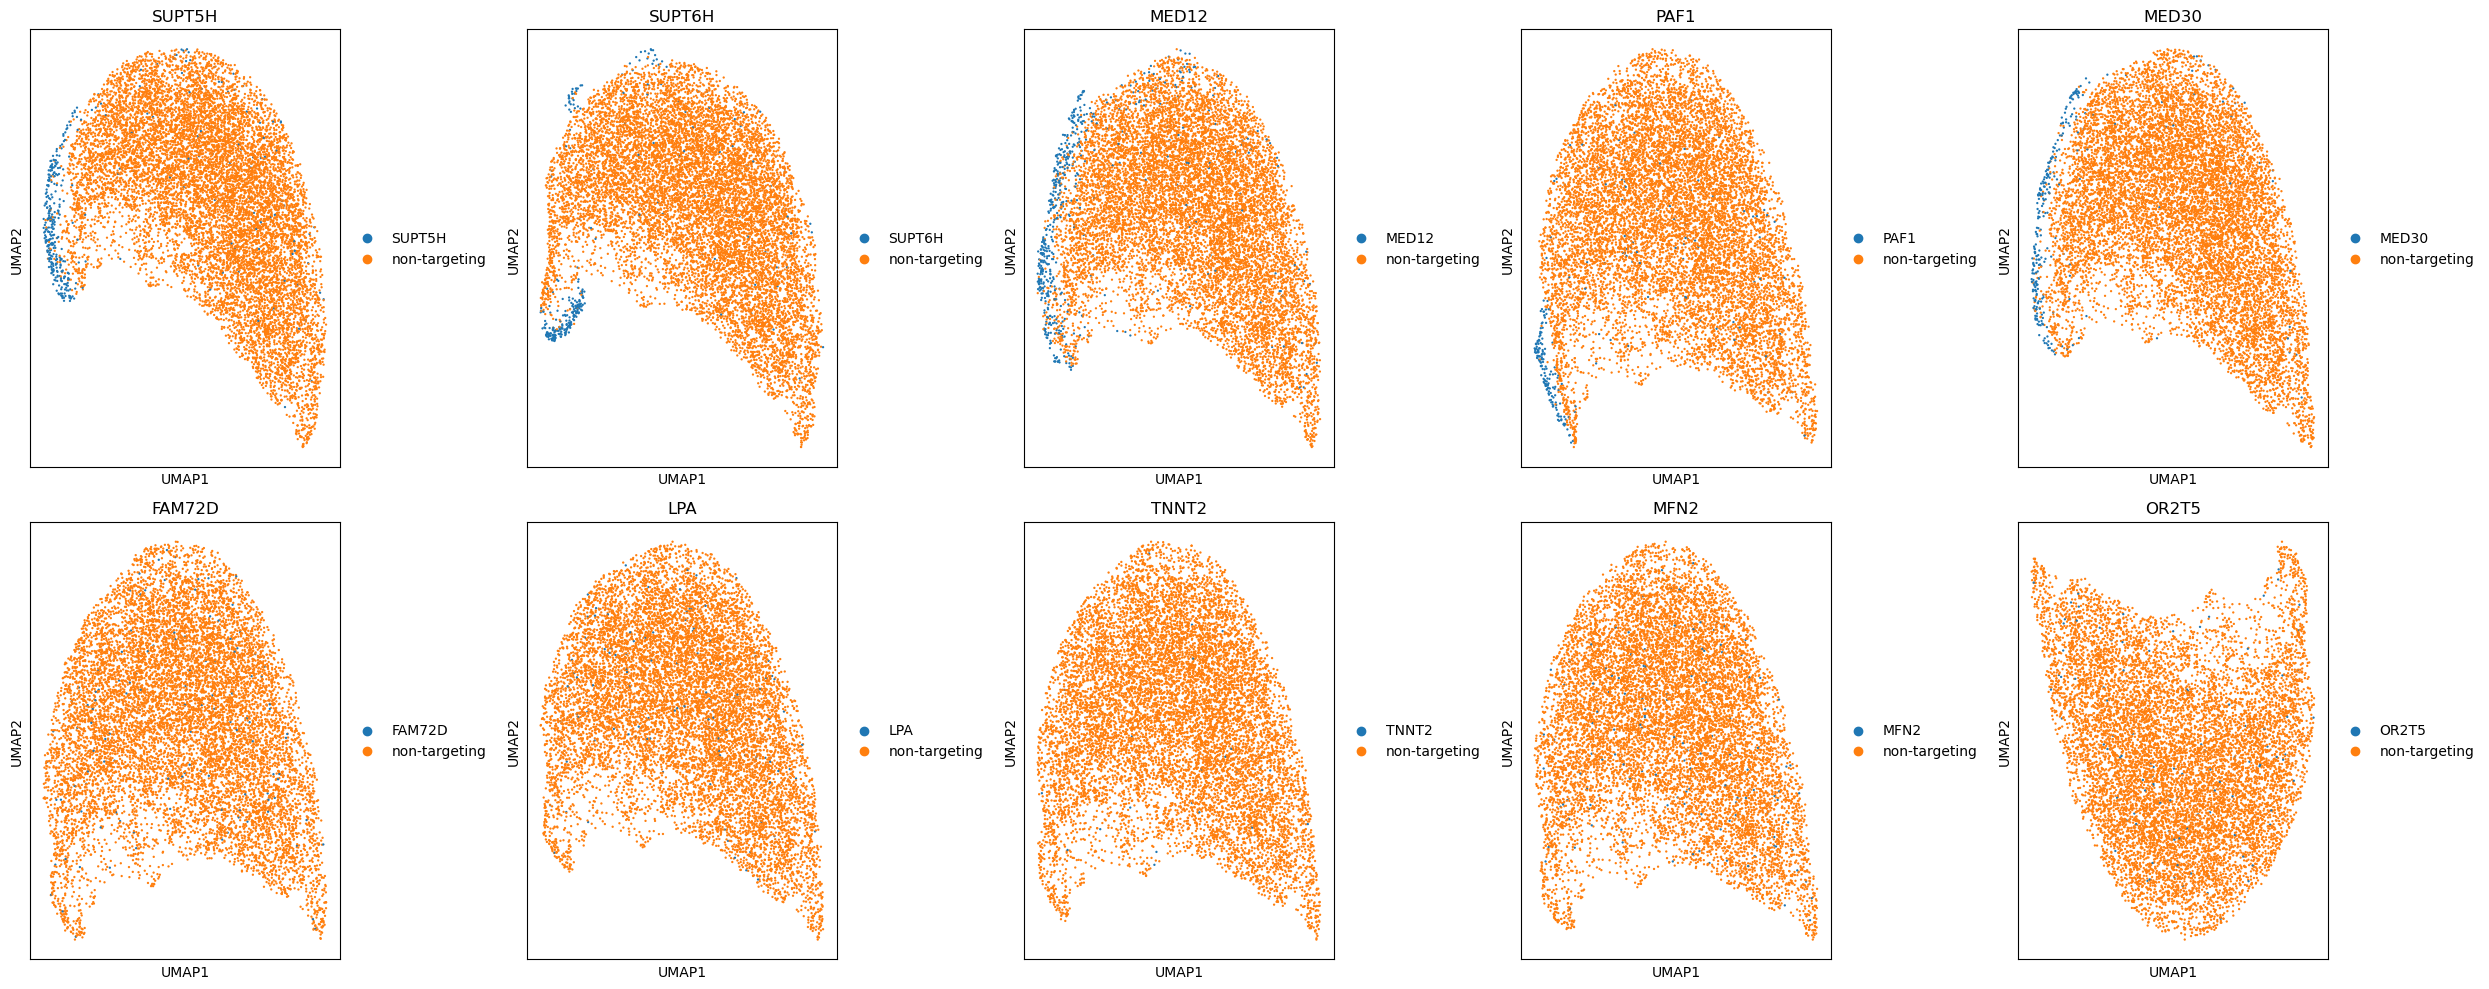

In [22]:
import scanpy as sc
import matplotlib.pyplot as plt

# Example lists of perturbations
# top_5_most = [...]
# top_5_least = [...]
perts = most_perturbative + least_perturbative  # combine them

# Create a 2×5 grid (total of 10 subplots)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

for idx, pert in enumerate(perts):
    # Determine subplot row/column
    row = idx // 5
    col = idx % 5
    ax = axes[row, col]

    # Subset the AnnData for the current perturbation + control
    mask = (adata.obs[dd.pert_key] == pert) | (adata.obs[dd.pert_key] == dd.control)
    sub_adata = adata[mask, :].copy()

    # Recompute neighbors and UMAP separately for this subset
    # Adjust n_neighbors, n_pcs as appropriate for your data
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=20)
    sc.tl.umap(sub_adata)

    # Plot the UMAP
    sc.pl.umap(
        sub_adata,
        color=dd.pert_key,  # color by perturbation
        ax=ax,
        show=False
    )
    ax.set_title(pert)

plt.tight_layout()
plt.show()


In [24]:
adata[adata.obs[dd.pert_key] == dd.control]

View of AnnData object with n_obs × n_vars = 10691 × 8563
    obs: 'gem_group', 'gene', 'gene_id', 'transcript', 'gene_transcript', 'sgID_AB', 'mitopercent', 'UMI_count', 'z_gemgroup_UMI', 'core_scale_factor', 'core_adjusted_UMI_count', 'cell_type'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'gene_id'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [26]:
adata[adata.obs[dd.pert_key].isin(most_perturbative)]

View of AnnData object with n_obs × n_vars = 1793 × 8563
    obs: 'gem_group', 'gene', 'gene_id', 'transcript', 'gene_transcript', 'sgID_AB', 'mitopercent', 'UMI_count', 'z_gemgroup_UMI', 'core_scale_factor', 'core_adjusted_UMI_count', 'cell_type'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'gene_id'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [27]:
#Find median number of datapoints per perturbation
adata.obs[dd.pert_key].value_counts().median()

121.0

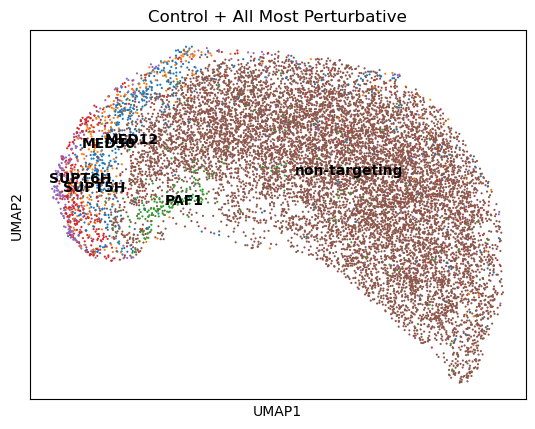

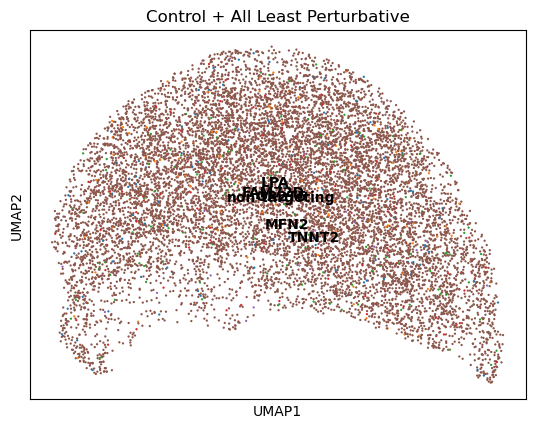

In [28]:
import scanpy as sc
import matplotlib.pyplot as plt

# Example lists of perturbations (e.g., 5 most and 5 least):
# most_perturbative = [...]
# least_perturbative = [...]
# dd.pert_key is the column name in adata.obs indicating the perturbation.
# dd.control is the name of the control condition in that column.

# 1) Control + all most perturbative
mask_most = adata.obs[dd.pert_key].isin(most_perturbative + [dd.control])
adata_most = adata[mask_most, :].copy()

sc.pp.neighbors(adata_most, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata_most)

sc.pl.umap(
    adata_most,
    color=dd.pert_key,
    title="Control + All Most Perturbative",
    legend_loc="on data",  # or "right margin"
    show=False
)

# 2) Control + all least perturbative
mask_least = adata.obs[dd.pert_key].isin(least_perturbative + [dd.control])
adata_least = adata[mask_least, :].copy()

sc.pp.neighbors(adata_least, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata_least)

sc.pl.umap(
    adata_least,
    color=dd.pert_key,
    title="Control + All Least Perturbative",
    legend_loc="on data",
    show=True
)


/orcd/data/omarabu/001/opitcho/miniforge3/envs/omnicell/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 8563 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/orcd/data/omarabu/001/opitcho/miniforge3/envs/omnicell/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 8563 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


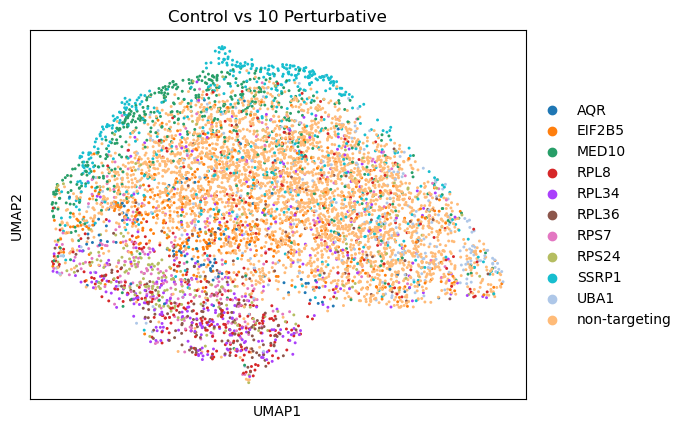

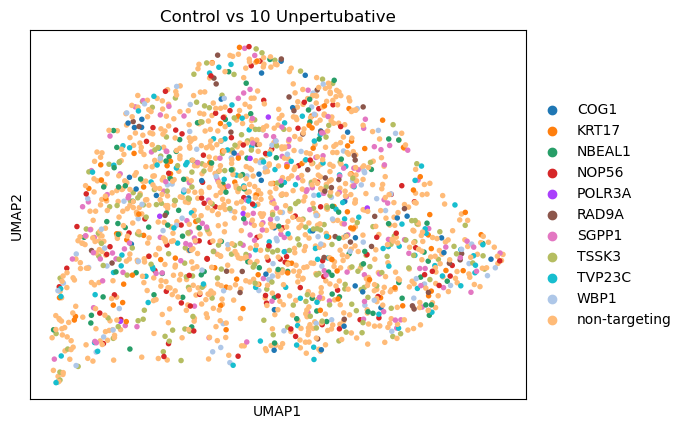

In [42]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

# Example lists of perturbations (e.g., top 5 most and 5 least).
# most_perturbative = [...]
# least_perturbative = [...]
# dd.pert_key: column name in adata.obs indicating the perturbation
# dd.control: the name/string identifying control cells in that column

# ---------------------------------------------------------------------------
# Control + All Most Perturbative
# ---------------------------------------------------------------------------

# 1) Identify cells in the "most perturbative" group
mask_most_pert = adata.obs[dd.pert_key].isin(most_perturbative)
adata_most_pert = adata[mask_most_pert, :]

# 2) Identify all control cells
mask_control = adata.obs[dd.pert_key] == dd.control
adata_control = adata[mask_control, :]

# 3) Randomly sample control cells equal to the number of "most perturbative" cells
np.random.seed(42)  # for reproducibility, if desired
n_pert_cells = adata_most_pert.n_obs
control_sample = np.random.choice(
    adata_control.obs_names,
    size=n_pert_cells,
    replace=False
)

# 4) Combine the "most perturbative" subset with the sampled control cells
combined_obs_names_most = set(adata_most_pert.obs_names).union(set(control_sample))
adata_most = adata[list(combined_obs_names_most), :].copy()

# 5) Compute a neighbors graph and UMAP for this combined subset
sc.pp.neighbors(adata_most, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata_most)

# 6) Plot
sc.pl.umap(
    adata_most,
    color=dd.pert_key,
    title="Control vs 10 Perturbative",
    legend_loc="right margin",
    show=False
)

# ---------------------------------------------------------------------------
# Control + All Least Perturbative
# ---------------------------------------------------------------------------

# 1) Identify cells in the "least perturbative" group
mask_least_pert = adata.obs[dd.pert_key].isin(least_perturbative)
adata_least_pert = adata[mask_least_pert, :]

# 2) Randomly sample control cells equal to the number of "least perturbative" cells
n_pert_cells_least = adata_least_pert.n_obs
control_sample_least = np.random.choice(
    adata_control.obs_names,
    size=n_pert_cells_least,
    replace=False
)

# 3) Combine the "least perturbative" subset with the sampled control cells
combined_obs_names_least = set(adata_least_pert.obs_names).union(set(control_sample_least))
adata_least = adata[list(combined_obs_names_least), :].copy()

# 4) Compute a neighbors graph and UMAP for this combined subset
sc.pp.neighbors(adata_least, n_neighbors=10, n_pcs=20)
sc.tl.umap(adata_least)

# 5) Plot
sc.pl.umap(
    adata_least,
    color=dd.pert_key,
    title="Control vs 10 Unpertubative",
    legend_loc="right margin",
    show=True
)


In [38]:
adata_most

AnnData object with n_obs × n_vars = 6684 × 8563
    obs: 'gem_group', 'gene', 'gene_id', 'transcript', 'gene_transcript', 'sgID_AB', 'mitopercent', 'UMI_count', 'z_gemgroup_UMI', 'core_scale_factor', 'core_adjusted_UMI_count', 'cell_type'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'gene_id'
    uns: 'pca', 'neighbors', 'umap', 'gene_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [39]:
adata_least

AnnData object with n_obs × n_vars = 1420 × 8563
    obs: 'gem_group', 'gene', 'gene_id', 'transcript', 'gene_transcript', 'sgID_AB', 'mitopercent', 'UMI_count', 'z_gemgroup_UMI', 'core_scale_factor', 'core_adjusted_UMI_count', 'cell_type'
    var: 'gene_name', 'chr', 'start', 'end', 'class', 'strand', 'length', 'in_matrix', 'mean', 'std', 'cv', 'fano', 'gene_id'
    uns: 'pca', 'neighbors', 'umap', 'gene_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/orcd/data/omarabu/001/opitcho/miniforge3/envs/omnicell/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 8563 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/orcd/data/omarabu/001/opitcho/miniforge3/envs/omnicell/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 8563 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/orcd/data/omarabu/001/opitcho/miniforge3/envs/omnicell/lib/python3.9/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 8563 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(
/orcd/data/omarabu/001/opitcho/miniforge3/envs/omnicell

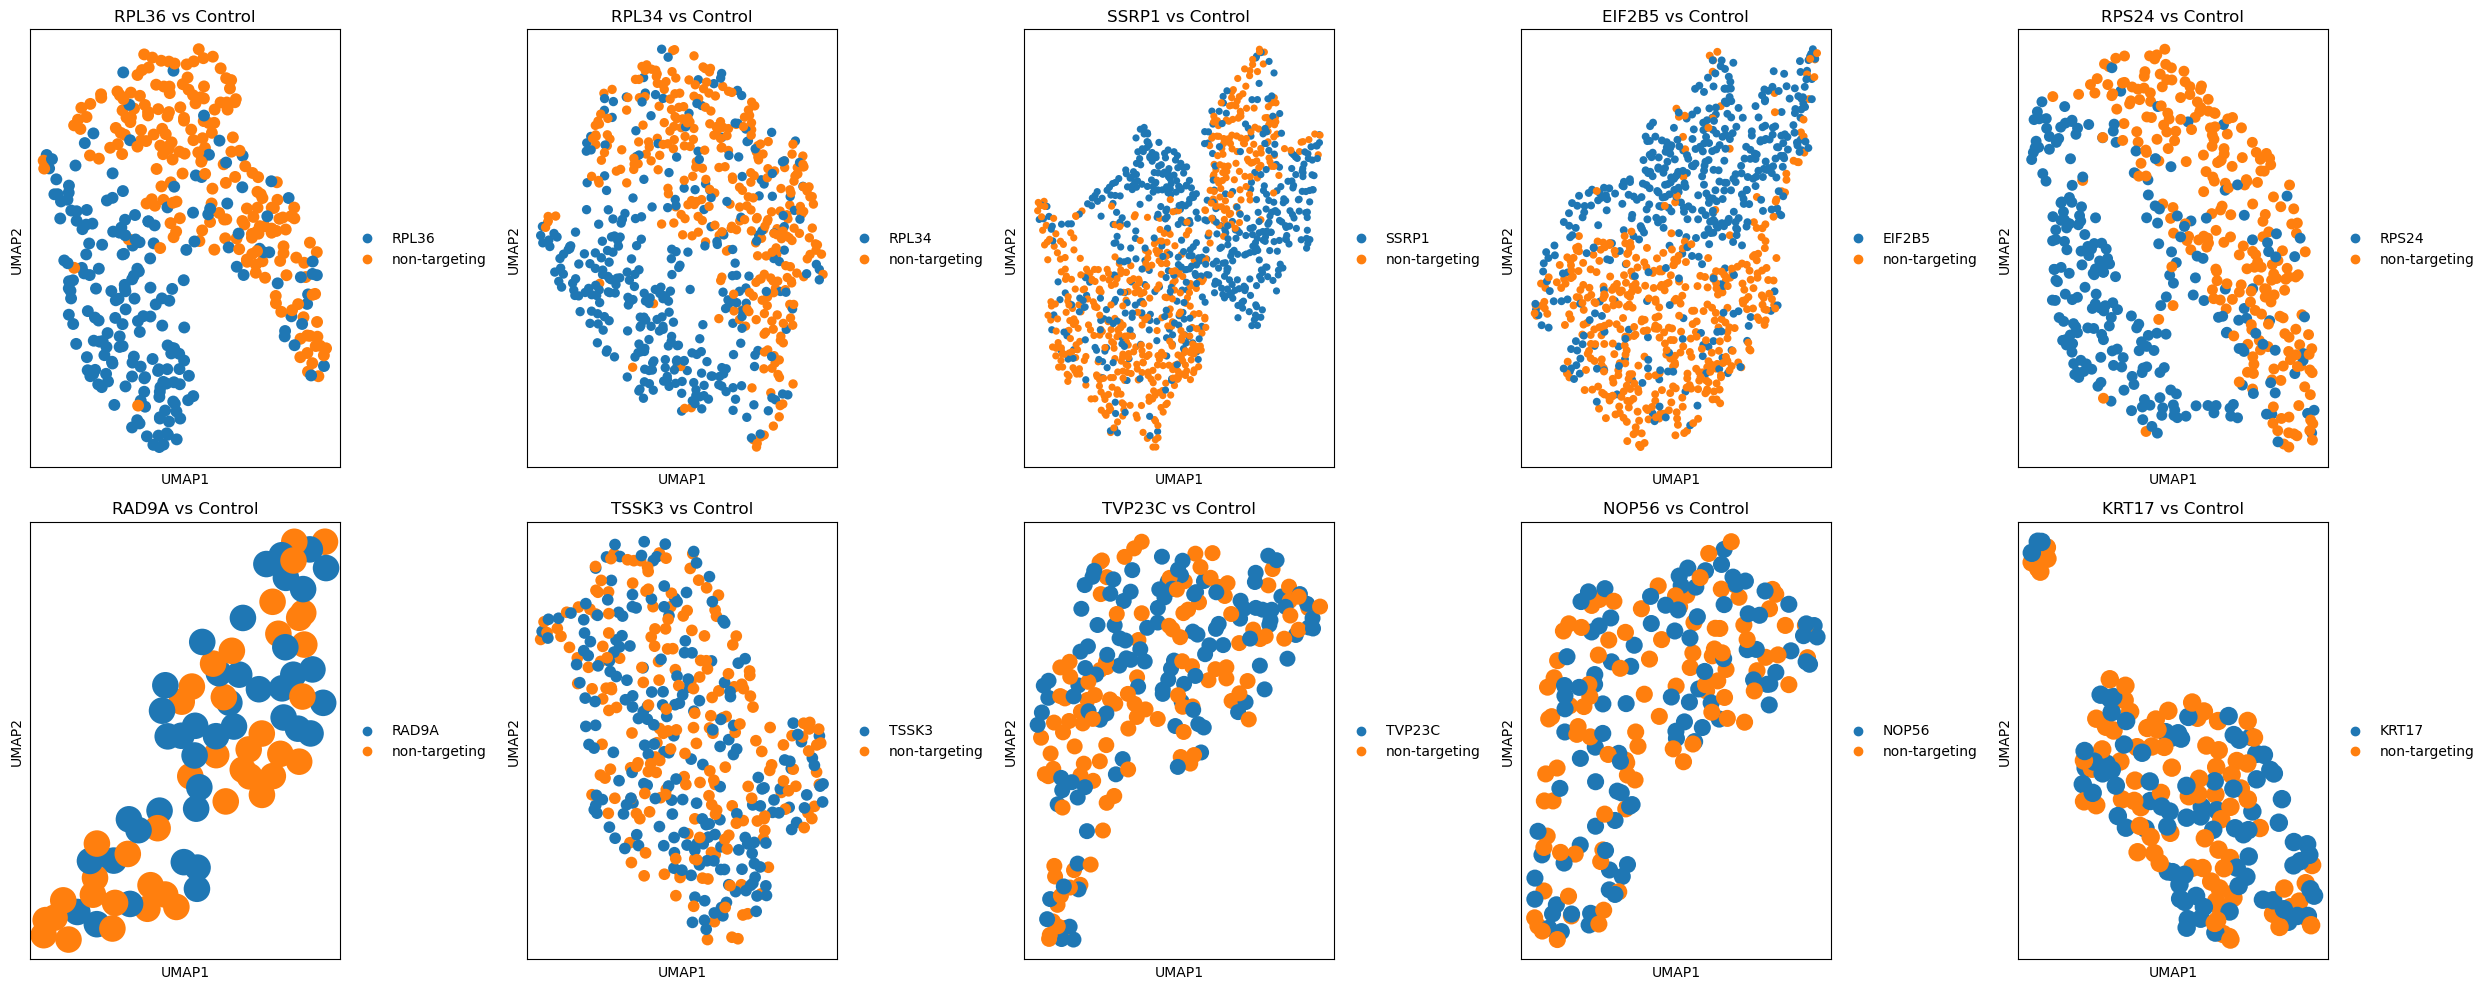

In [47]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

# Suppose these lists are defined:
# most_perturbative = [...]
# least_perturbative = [...]
perts = most_perturbative + least_perturbative

# dd.pert_key is the name of the column in adata.obs indicating perturbation
# dd.control is the string/key identifying control cells in that same column

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))
axes = axes.ravel()  # flatten for easier indexing

# Identify all control cells once
mask_control = adata.obs[dd.pert_key] == dd.control
adata_control = adata[mask_control, :]

# Set a random seed for reproducibility if desired
np.random.seed(42)

for idx, pert in enumerate(perts):
    ax = axes[idx]
    
    # Subset for the current perturbation only
    mask_pert = (adata.obs[dd.pert_key] == pert)
    adata_pert = adata[mask_pert, :]
    
    # Randomly sample the same number of control cells as perturbation cells
    n_pert_cells = adata_pert.n_obs
    control_sample = np.random.choice(
        adata_control.obs_names,
        size=n_pert_cells,
        replace=False
    )
    
    # Combine perturbation cells + sampled control cells
    combined_obs = set(adata_pert.obs_names).union(control_sample)
    sub_adata = adata[list(combined_obs), :].copy()
    
    # Compute a neighbors graph & UMAP just for these cells
    sc.pp.neighbors(sub_adata, n_neighbors=10, n_pcs=20)
    sc.tl.umap(sub_adata)
    
    # Plot on the same axes
    sc.pl.umap(
        sub_adata,
        color=dd.pert_key,   # color by perturbation vs. control
        ax=ax,
        show=False
    )
    ax.set_title(f"{pert} vs Control")

plt.tight_layout()
plt.show()